<strong><h1>Predecir si los clientes de un banco serán propensos a sacar un crédito a largo plazo</h1></strong>

<em><strong><h2>Objetivo:</h2></strong></em>
<h4>Obtener información que permita al banco determinar si un cliente potencial sacará un crédito a largo plazo o no</h4>

<em><strong><h2>Contexto Comercial:</h2></strong></em>
<h4>Una institución bancaria portuguesa ha encontrado que sus ingresos han disminuído en el último periodo,despues de una investigación descubrieron que la causa de dicha disminución es que los clientes no están invirtiendo lo suficiente en depósitos a largo plazo.Por tanto, en aras de incrementar sus ingresos reunieron la información de los clientes que participaron en las campañas de marketing anteriores que se basaron en llamadas telefonicas y sus resultados y con esta información buscan crear un modelo de predicción que les ayude a identificar los clientes con mayor probabilidad de suscribirse a un crédito a largo plazo para centrar sus esfuerzos de marketing en dichos clientes.</h4>

<em><strong><h2>Problema Comercial:</h2></strong></em>
<h4>¿Existen patrones particulares en los grupos de clientes que nos permitan detectar si tomarán el préstamo a largo plazo?</h4>


<em><strong><h2>Contexto Analítico:</h2></strong></em>
<h4>El banco ha recopilado la información de las campañas de marketing que ha realizado de mayo de 2008 a noviembre de 2010 y hay dos conjuntos de datos: train.csv que es el conjunto de entrenamiento con 32950 registros y test.csv que es el conjunto de prueba y tiene 8238 registros sin resultado final.A continuación se describen las variables que se consideran en los conjuntos de datos.</h4>

<strong><em><h3>Variable objetivo-Target (a predecir):</h3></em></strong>
 <h4>El cliente se suscribe a un préstamo a largo plazo (y) ('sí/No')</h4>

<strong><em><h3>Variables de entrada-Features:</h3></em></strong>
<h3>
<ul>
<li><strong>Edad (age):</strong><p>Edad en años</p></li>

<li><strong>Tipo de trabajo (job):</strong> <p>('administrador', 'cuello azul', 'empresario', 'criada', 'gerencia', 'jubilado', 'autónomo', 'servicios', 'estudiante', 'técnico', ' desempleado', 'desconocido')</p></li>

<li><strong>Estado cívil (marital):</strong><p>('divorciado', 'casado', 'soltero', 'desconocido'; nota: 'divorciado' significa divorciado o viudo)</p></li>

<li><strong>Nivel de educación (education):</strong><p>('básico.4 años','básico.6 años','básico.9 años','bachillerato','analfabetos','curso.profesional','título.universitario','desconocido')</p></li>

<li><strong>Defecto (default):</strong><p>tiene credito en mora? ('no', 'sí', 'desconocido')</p></li>

<li><strong>Alojamiento (housing):</strong><p>Tiene préstamo de vivienda? ('no', 'sí', 'desconocido')</p></li>

<li><strong>Préstamo (loan):</strong><p>Tiene préstamo personal? ('no', 'sí', 'desconocido')</p></li>

<li><strong>Contacto (contact):</strong><p>Tipo de comunicación de contacto ('celular', 'teléfono')</p></li>

<li><strong>Mes (month):</strong><p>Último contacto mes del año ('ene', 'feb', 'mar', …, 'nov', 'dec')</p></li>

<li><strong>Día de la semana(dayofweek):</strong><p>último día de contacto de la semana ('lunes', 'martes', 'miércoles', 'jueves', 'viernes'</p></li>

<li><strong>duración (duration) : </strong><p>Duración del último contacto, en segundos. Nota importante: este atributo afecta en gran medida el objetivo de salida (por ejemplo, si la duración = 0, entonces y = 'no')</p></li>

<li><strong>Campaña (campaign): </strong><p>	número de contactos realizados durante esta campaña y para este cliente (incluye último contacto)</p></li>

<li><strong>Días pasados (pdays): </strong><p>número de días que pasaron desde la última vez que se contactó al cliente de una campaña anterior (999 significa que no se contactó al cliente anteriormente)</p></li>

<li><strong>Anterior (previous): </strong><p>Número de contactos realizados antes de esta campaña y para este cliente</p></li>

<li><strong>Resultado (poutcome):</strong> <p>resultado de la campaña de marketing anterior ('fracaso', 'inexistente', 'éxito'</p></li>


<em><strong><h2>Análisis exploratorio de datos (EDA)</h2></strong></em>

Sitio donde encontramos la base de datos:https://www.kaggle.com/datasets/rashmiranu/banking-dataset-classification

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels
from scipy import stats


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Proyecto Final Ciencia de Datos/new_test.csv') #Conjunto de datos de prueba (test)
df1=pd.read_csv('/content/drive/MyDrive/Proyecto Final Ciencia de Datos/new_train.csv') #Conjunto de datos de entrenamiento (train)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome
0,32,4,0,6,0,0,0,0,3,3,131,5,1
1,37,10,3,6,0,0,0,0,4,3,100,1,1
2,55,5,0,5,1,2,0,0,3,2,131,2,1
3,44,2,1,0,1,0,0,1,4,3,48,2,1
4,28,0,2,3,0,0,0,0,5,0,144,2,1


In [ ]:
df1.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [ ]:
df1.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


<strong><em><h2>Algunos gráficos descriptivos</h2></em></strong>

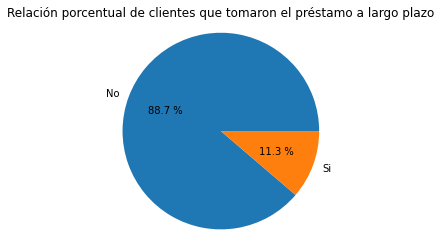

In [ ]:
data=df1['y'].value_counts()
names=['No','Si']
plt.pie(data,labels=names,autopct="%0.1f %%")
plt.axis("equal")
plt.title('Relación porcentual de clientes que tomaron el préstamo a largo plazo')
plt.show()

<strong><h3>Analisis del diagrama de pie:</h3><strong/>

<h4>Según se puede observar en el diagrama de pie solo el 11.3% de los clientes que participaron en las campañas de publicidad del banco sacaron un prestamo a largo plazo, mientras que el 88.7% decidieron no hacerlo.<h4/>

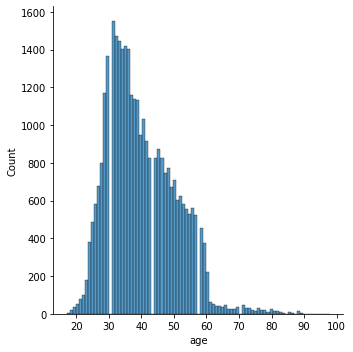

In [ ]:
sns.displot(data=df1,x='age')
plt.show()

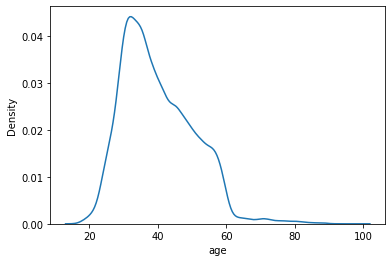

In [ ]:
sns.kdeplot(data=df1, x='age');

<strong/><h3>Analisis del gráfico de estimación de Kernel (kde-plot) segun la edad de las personas</h3><strong/>
<h4>Con este grafico podemos analizar que el banco tiene mucha mas posibilidades de otorgar un préstamo a personas que van de 25 a 40 años de edad aproximadamente.
Ya que sus condiciones de vida son mas favorables y por esta razón enfoca sus campañas en personas contempladas en este rango de edad.</h4>  

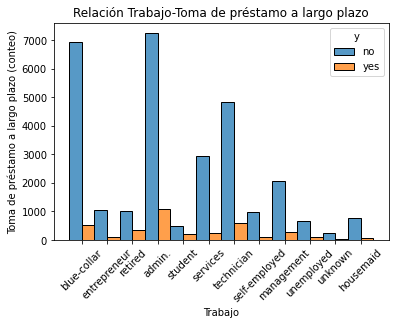

In [ ]:
sns.histplot(data=df1,x='job',hue=df1['y'],stat='count',multiple='dodge')
plt.xticks(rotation=45)
plt.title('Relación Trabajo-Toma de préstamo a largo plazo')
plt.xlabel('Trabajo')
plt.ylabel('Toma de préstamo a largo plazo (conteo)')
plt.show()

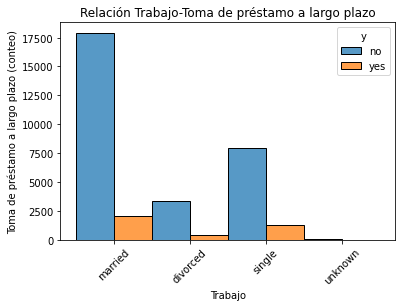

In [ ]:
sns.histplot(data=df1,x='marital',hue=df1['y'],stat='count',multiple='dodge')
plt.xticks(rotation=45)
plt.title('Relación Trabajo-Toma de préstamo a largo plazo')
plt.xlabel('Trabajo')
plt.ylabel('Toma de préstamo a largo plazo (conteo)')
plt.show()

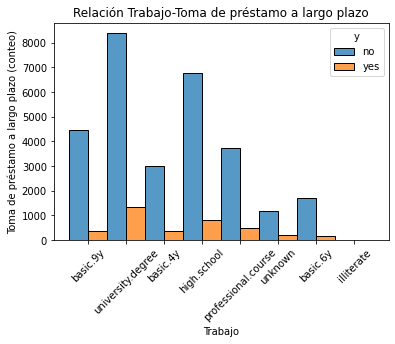

In [ ]:
sns.histplot(data=df1,x='education',hue=df1['y'],stat='count',multiple='dodge')
plt.xticks(rotation=45)
plt.title('Relación Trabajo-Toma de préstamo a largo plazo')
plt.xlabel('Trabajo')
plt.ylabel('Toma de préstamo a largo plazo (conteo)')
plt.show()

<strong><h3>Analisis de los histogramas respecto al trabajo, estado cívil y escolaridad</h3><strong/>
<h4>Se puede observar que la mayoría de los clientes de las campañas son clientes que trabajan como administrativos o de cuello azul, la mayor parte casados y con la universidad terminada;por tanto se observa que la cantidad de clientes que tomaron el crédito a largo plazo que cumplen estas condiciones es mayor que quienes lo tomaron y no las cumplen.<h4/>

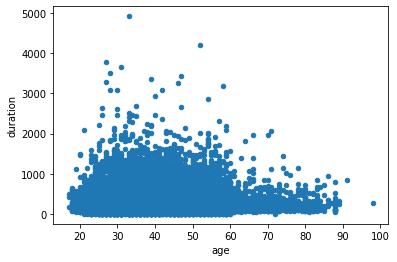

In [ ]:
df1.plot(kind="scatter", x="age", y="duration") 
plt.show;

<strong><h3>Analisis del gráfico de dispersión (scatter-plot) segun la edad de la persona y el tiempo de la llamada</h3></strong>

<h4>Se puede observar que no hay una correlación entre la variable "duración" y la variable edad; la variable <strong><em>duración</em></strong> es de gran importancia ya que los clientes que accedieron a tomar el préstamo a largo plazo tomaron esta llamada, y pensabamos que podría haber una correlación evidente entre estas dos variables ya que el banco enfoca sus campañas en unos grupos de cierta edad más que en otros y la duración de la última llamada tiene relación con la toma del préstamo a largo plazo; sin embargo, vemos que no hay una correlación evidente entre la edad y la duración de la última llamada según el gráfico de dispersión.</h4>



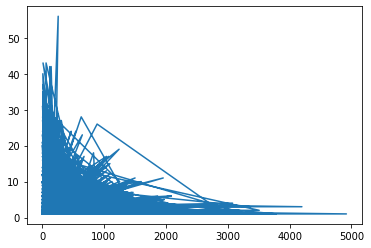

In [ ]:
plt.plot(df1['duration'],df1['campaign'])
plt.show()

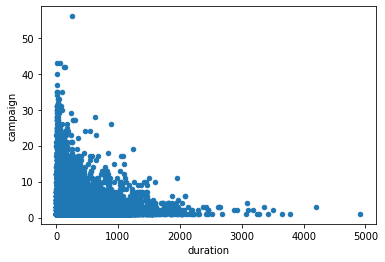

In [ ]:
df1.plot(kind="scatter", x="duration", y="campaign")
plt.show()

<strong/><h3>Analisis con diagrama de dispersión y diagrama de línea segun la duración de la última llamada y el total de llamadas de la campaña</h3><strong/>
<h4>Encontramos que pareciera que hay una correlación entre el número de llamadas realizadas a un cliente durante la campaña y la duración de la última llamada,donde parece que entre menos llamadas haya recibido durante la campaña mayor será la duración de la última llamada; sin embargo, es difícil confirmarlo solo empleando el gráfico de dispersión ya que la aglomeración de datos asociados al cero en ambas variables no permite evidenciar completamente una correlación y en el diagrama de línea no se evidencia una relación directa ya que se ven líneas en múltiples direcciones; por tanto para confirmar la teoría de existencia de correlación entre estas variables, deberíamos analizar si la correlación tiende a uno directamente. </h4>  

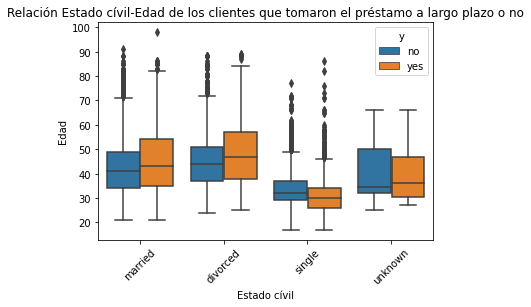

In [ ]:
sns.boxplot(data=df1,x='marital',y='age',hue='y',dodge=True)
plt.xticks(rotation=45)
plt.title('Relación Estado cívil-Edad de los clientes que tomaron el préstamo a largo plazo o no')
plt.xlabel('Estado cívil')
plt.ylabel('Edad')
plt.show()

<strong><h3>Analisis del diagrama de cajas y Bigotes:</h3><strong/>
<h4>Se puede observar que el comportamiento de los clientes con el mismo estado civil frente a la aceptación del crédito a largo plazo es muy similar, sin embargo, los clientes casados y los divorciados que aceptaron el préstamo suelen ser de mayor edad que los que no, de hecho se observa en los clientes con este estado cívil que el rango intercuartil con respecto a la edad es mayor; cosa que no sucede en los estados civil 'soltero' o 'desconocido', lo que nos puede indicar que en las personas 'casadas' y 'divorciadas' entre aproximadamente 45 y 55 años es más probable que acepten un crédito a largo plazo.<h4/>


<em><strong><h2>Obtención de insights (Data Engineering)</h2></strong></em>

<strong><h3>Hipótesis a partir de los hallazgos encontrados hasta ahora</h3><strong>

<strong><h4>¿Es la edad una variable significativa para que un cliente acepte el crédito a largo plazo?</h4></strong>
<h4>De acuerdo al diagrama de cajas y bigotes se podría pensar que los clientes en ciertas edades acceden más facilmente a adquirir el crédito a largo plazo que los clientes de otras edades, para ello se plantea la siguiente hipótesis</h4>
<h4>En el contexto,
$\mu_1$ es el promedio de edad de los clientes que accedieron a tomar el péstamo a largo plazo y $ \mu_2$ es el promedio de edad de los clientes que no accedieron a tomar el péstamo a largo plazo.</h4>
<h2>Hipotesis Nula</h2>
 $H_0:\mu_1=\mu_2$ 
 <h2>Hipotesis alternativa</h2>
$H_1: \mu_1 \neq \mu_2$

<h4>La prueba estadística nos ayudará a decidir si hay suficiente evidencia para rechazar la hipótesis nula a favor de una alternativa.</h4>


In [ ]:
loans=df1[df1.y=="yes"].age
no_loans=df1[df1.y=="no"].age

<h3>Veamos si las varianzas de ambos grupos son independientes</h3>

In [ ]:
loans.var(),no_loans.var()

(189.33816054785865, 97.8448742874101)

<h4>Los grupos tienen varianzas diferentes</h4>

<h4>Como los grupos son independientes y las varianzas son diferentes, podemos aplicar la prueba t para diferente varianza</h4>

<h3>Prueba T para muestras independientes</h3>

In [ ]:
statistic, pvalue = stats.ttest_ind(loans,no_loans, equal_var=False)
print('Estadistico:',round(statistic,2),'p-valor:', round(pvalue,4))

Estadistico: 4.05 p-valor: 0.0001


<h4>El pvalue es del 0.1%, esto significa que con un error alfa de  5%, podemos rechazar la hipótesis nula de que las medias de los dos grupos son iguales con  la expectativa de la distribución t estándar.</h4>

<h3>Prueba de diferencia de muestras</h3>

<h4>Ahora podemos buscar el intervalo de la diferencia de muestras, considerando que nuestras variazas son diferentes, usaremos un alfa del 5%</h4>

In [ ]:
import numpy as np, statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(loans), sms.DescrStatsW(no_loans))
print(cm.tconfint_diff(0.05,usevar='unequal'))

(0.4863933171713106, 1.4005420244129803)


De acuerdo a la prueba podemos decir con un 95% de confianza que las medias de los dos grupos tendrán una diferencia entre 0.48 y 1.40 años

<h3>Para tener más información calcularemos los intervalos de confianza</h3>

<h3>Intervalos de confianza para el grupo que aceptó el crédito</h3>

In [ ]:
from scipy.stats import t
m = loans.mean()
s = loans.std()
dof = len(loans)-1
confianza = 0.95
t_crit = np.abs(t.ppf((1-confianza)/2,dof)) # Valor critico
print(t_crit)
(m-s*t_crit/np.sqrt(len(loans)), m+s*t_crit/np.sqrt(len(loans))) # Intervalo

1.9606034434439101


(40.40849591559584, 41.29409029130071)

<h4>Con un 95% de confianza sabemos que el promedio de edad del grupo que aceptó el prestamo a largo plazo está entre 40.4 y 41.29 años</h4>

<h3>Intervalos de confianza para el grupo que no aceptó el crédito</h3>

In [ ]:
from scipy.stats import t
m = no_loans.mean() #media
s = no_loans.std() #desviación
dof = len(no_loans)-1 #Grados de libertad
confianza = 0.95
t_crit = np.abs(t.ppf((1-confianza)/2,dof)) # Valor critico
print(t_crit)
(m-s*t_crit/np.sqrt(len(no_loans)), m+s*t_crit/np.sqrt(len(no_loans))) # Intervalo

1.9600451271939472


(39.79443895102868, 40.02121191428358)

<h4>Con un 95% de confianza sabemos que el promedio de edad del grupo que no aceptó el prestamo a largo plazo está entre 39.5 y 40.02 años</h4>

<h3><strong>Respuesta:</strong></h3>
<h4>Podemos decir de acuerdo a las pruebas realizadas que hay información estadística suficiente para rechazar la hipótesis nula de que el promedio de edad de las personas que aceptaron tomar un crétito a largo plazo es igual al promedio de edad de quienes no lo hicieron y por tanto podemos decir que la variable edad es una variable representativa para la aceptación del crédito</h4>

<strong><h3>¿Es la duración promedio de la última llamada de los clientes que aceptaron el préstamo a largo plazo mayor que la duración promedio de los clientes que no lo aceptaron?</h3></strong>
<h4>De acuerdo al set de datos la duración de la última llamada es una variable determinante para que un cliente acepte el crédito a largo plazo, vamos a comprobarlo</h4>
<h4>En el contexto,
$\mu_1$ es el promedio de duración de la llamada en minutos  de los clientes que accedieron a tomar el péstamo a largo plazo y $ \mu_2$ es el promedio de duración de los clientes que no accedieron a tomar el péstamo a largo plazo.</h4>
<h2>Hipotesis Nula</h2>
 $H_0:\mu_1> \mu_2$ 
 <h2>Hipotesis alternativa</h2>
$H_1: \mu_1 < \mu_2$

<h4>La prueba estadística nos ayudará a decidir si hay suficiente evidencia para rechazar la hipótesis nula a favor de una alternativa.</h4>


In [ ]:
loans_group=df1[df1.y=="yes"].duration
no_loans_group=df1[df1.y=="no"].duration

<h3>Veamos si las varianzas de ambos grupos son independientes</h3>

In [ ]:
loans_group.var(),no_loans_group.var()

(157998.3476464861, 43390.37168177347)

<h4>Las varianzas son independientes y muy diferentes</h4>
<h4>Como las varianzas son diferentes podemos aplicar la prueba T para varianzas independientes</h4>

<h3>Prueba T para muestras independientes con varianza desigual y de una sola cola</h3>

In [ ]:
from scipy.stats import ttest_ind

statistic, pvalue = ttest_ind(loans_group, no_loans_group, alternative="less",equal_var=False)
print('Estadistico:',round(statistic,2),'p-valor:', round(pvalue,4))

Estadistico: 49.46 p-valor: 1.0


<h4>El pvalue es del 100%, esto significa que con un error alfa del  5%,no hay información estadistica suficiente para rechazar la hipótesis nula de que la duración promedio de la última llamada del grupo que adquirió el préstamo es mayor que la duración promedio del grupo que no lo adquirió</h4>

<h4>Ahora podemos buscar el intervalo de la diferencia de muestras, considerando que nuestras variazas son diferentes, usaremos un alfa del 5%</h4>

In [ ]:
import numpy as np, statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(loans_group), sms.DescrStatsW(no_loans_group))
print(cm.tconfint_diff(0.05,usevar='unequal'))

(315.2387586210475, 341.26279886289535)


De acuerdo a la prueba podemos decir con un 95% de confianza que las medias de los dos grupos tendrán una diferencia entre 315.23 minutos y 341.26 minutos

<h3>Para tener más información calcularemos los intervalos de confianza</h3>

<h4>Intervalos de confianza para el grupo que aceptó el crédito</h4>

In [ ]:
from scipy.stats import t
m = loans_group.mean()
s = loans_group.std()
dof = len(loans_group)-1 #grados de libertad
confianza = 0.95
t_crit = np.abs(t.ppf((1-confianza)/2,dof)) # Valor critico
print(t_crit)
(m-s*t_crit/np.sqrt(len(loans_group)), m+s*t_crit/np.sqrt(len(loans_group))) # Intervalo

1.9606034434439101


(536.6077538990988, 562.1901986871081)

<h4>Con un 95% de confianza sabemos que el promedio de duración de la última llamada del grupo que aceptó el prestamo a largo plazo está entre 536.6 minutos y 562.19 minutos</h4>

In [ ]:
from scipy.stats import t
m = no_loans_group.mean() #media
s = no_loans_group.std() #desviación
dof = len(no_loans_group)-1 #Grados de libertad
confianza = 0.95
t_crit = np.abs(t.ppf((1-confianza)/2,dof)) # Valor critico
print(t_crit)
(m-s*t_crit/np.sqrt(len(no_loans_group)), m+s*t_crit/np.sqrt(len(no_loans_group))) # Intervalo

1.9600451271939472


(218.76044716073434, 223.53594794152983)

<h4>Con un 95% de confianza sabemos que el promedio de duración de la última llamada del grupo que no aceptó el prestamo a largo plazo está entre 218.7 minutos y 223.5 minutos</h4>

In [ ]:
loans_group.mean(),no_loans_group.mean()

(549.3989762931035, 221.14819755113209)

<h3><stron>Respuesta:</strong></h3>
<h4>Podemos decir de acuerdo a las pruebas realizadas que hay información estadística suficiente para no rechazar la hipótesis nula de que la duraciónd de la última llamada de las personas que aceptaron el préstamo a largo plazo es mayor que la duración de la última llamada de las personas que no lo aceptaron y por tanto la varible duración de la última llamada es una variable representativa para determinar la toma de la decisión del cliente. </h4>

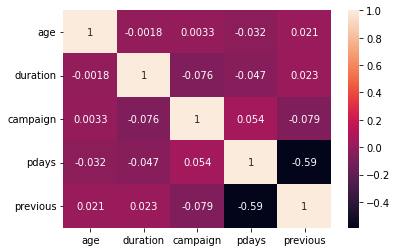

In [ ]:
sns.heatmap(df1.corr(),annot=True); 
plt.show()

<strong><h3>Analisis del Mapa de calor</h3><strong/>
<h4>No se observa una correlación entre las variables numéricas que sea de utilidad para elaborar hipótesis.Ya que la correlación que se ve en el mapa de calor indica que entre más días han pasado desde la última vez que se contactó el cliente de una campaña anterior  menos contactos se han tenido con el cliente antes de esta campaña, la cual es una relación que se podría dar por sentada;sin embargo, es bueno evaluar la fuerza de la relación entre estas dos variables antes de asumir una dependencia.<h4/>

<strong><h3>Regresión líneal y Correlación de Pearson</h3><strong/>

<h3>De acuerdo con el mapa de calor puede existir una relación inversa entre las variables pdays y previous ¿veamos si es verdad que entre más días han pasado desde el último contacto con un cliente de una campaña anterior, menos contactos se han tenido con el mismo</h3>

In [ ]:
df1[['pdays','previous']].corr()

,pdays,previous
pdays,1.000000,-0.589601
previous,-0.589601,1.000000


In [ ]:
import statsmodels.api as sm
x=df1[['pdays']]
y=df1[['previous']]
xconstant=sm.add_constant(x)
xconstant.head

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<bound method NDFrame.head of        const  pdays
0        1.0    999
1        1.0    999
2        1.0    999
3        1.0    999
4        1.0    999
...      ...    ...
32945    1.0    999
32946    1.0    999
32947    1.0    999
32948    1.0    999
32949    1.0    999

[32950 rows x 2 columns]>

In [ ]:
modelo=sm.OLS(y,xconstant)
ols=modelo.fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:               previous   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                 1.756e+04
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        17:40:56   Log-Likelihood:                -16813.
No. Observations:               32950   AIC:                         3.363e+04
Df Residuals:                   32948   BIC:                         3.365e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6808      0.012    145.131      0.0

<strong><h4>Interpretación del R cuadrado</h4><strong/>
<h4>El 34.8% de la varianza del número de contactos con el cleinte desde la última campaña es explicado por el número de días que han pasado desde la última campaña</h4>

<strong><h4>Interpretación del p-value en la tabla de resultados de la regresión para ver si hay una relación líneal</h4><strong/>
<h4>Dado que el p-value de la prueba T es menor que el 5% podemos decir que se rechaza la hipótesis nula que dice que el coeficiente de determinación es igual a 0 y por tanto se puede decir que si hay una relación líneal entre el número de contactos realizados a un cliente antes de la campaña actual y el número de días transcurridos desde el último contacto que se tuvo con un cliente</h4>

<strong><h4>Veamos si la distribución de los residuales se parece a una curva normal</h4><strong/>
<h4> La Asimetria (Skew) del estadistico Jarque-Bera es lejana a cero, en la distribución normal la Asimetría es cero, la kurtosis en la distribución normal es cercana a 3 y vemos que para este caso el valor de la kurtosis de los residuales se aleja bastante de 3; así que de manera general podemos decir que no se cumple el supuesto de que haya normalidad en los residuales </h4>

<strong><h4>Veamos si hay independencia de los residuales</h4><strong/>
<h4> Como el estadistico de Durbin-Watson (1.989) se encuentra dentro del rango entre 1.5 y 2.5, significa que los residuales no están correlacionados entre ellos y por tanto se cumple el supuesto de independecia de los residuales</h4>

In [ ]:
from sklearn.model_selection import train_test_split
x=df1[['pdays']]
y=df1[['previous']]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=0)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr=LinearRegression()
lr.fit(x_train,y_train)

y_pred=lr.predict(x_test)
y_pred=lr.predict(x_test)
y_pred

array([[0.11712623],
       [0.11712623],
       [0.11712623],
       ...,
       [0.11712623],
       [0.11712623],
       [0.11712623]])

In [ ]:
resultados=pd.DataFrame()

In [ ]:
resultados['y_test']=y_test
resultados['y_pred']=y_pred
resultados['residuales']=resultados['y_test']-resultados['y_pred']
resultados.head()

,y_test,y_pred,residuales
5379,0,0.117126,-0.117126
13301,0,0.117126,-0.117126
15089,0,0.117126,-0.117126
8998,0,0.117126,-0.117126
18820,0,0.117126,-0.117126


<strong><h4>Veamos si hay homocedasticidad</h4><strong/>


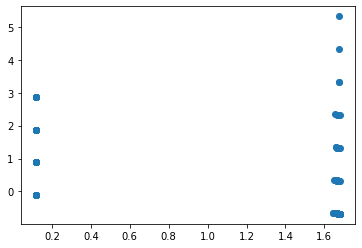

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(resultados['y_pred'],resultados['residuales'])

<strong><h4>Análisis del diagrama de dispersión para analizar si hay homocedasticidad</h4><strong/>
<h4> Vemos en la gráfica que los residuales no se comportan de manera aleatoria, por el contrario vemos que la variabilidad se mantiene constante a lo largo de todo el dominio,sin embargo, no se observa que se forme un patrón con los residuales así que podría pensarse que la heterocedasticidad no es un prblema para este caso y se cumple el principio de homocedasticidad</h4>

<strong><h4>Conclusiones respecto al cumplimiento de los supuestos y el coeficiente de determinación</h4><strong/>
<h4> Vemos que el supuesto de normalidad de los residuales no se cumple y el coeficiente de determinación no es tan alto como para asumir que hay una relación líneal, por tanto un modelo de regresión líneal entre la variables "días transcuridos desde el último contacto" y la variable de "contactos realizados desde la última campaña" no sería completamente válido estadisticamente y dado que ninguna de estas variables es target sería mejor no emplearlo para nuestros futuros análisis</h4>

<h4>Intervalos de confianza para el grupo que no aceptó el crédito</h4>

<strong><h3>Modelos de Aprendizaje Supervisado</h3><strong>


<strong><h4>Regresión Logística</h4><strong/>
<h4>Dados los resultados de la prueba T realizada a la varible edad para ver si esta es una variable representativa a la hora de que un cliente decida o no pedir un préstamo a largo plazo se realizará un modelo de regresión logística para analizar esta relación</h4>

In [ ]:
df1['Target']=np.where(df1['y']=='yes',1,0)
df1.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y,Target
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no,0
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no,0
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes,1
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no,0
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no,0


In [ ]:
from sklearn.model_selection import train_test_split
x1=df1[['age']]
y1=df1.Target

x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.2,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logr = LogisticRegression()
logr.fit(x_train,y_train)
y_pred=logr.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(accuracy_score(y_test,y_pred))

0.8854324734446131


In [ ]:
from sklearn.metrics import confusion_matrix
cm=(confusion_matrix(y_test,y_pred))
cm

array([[5835,    0],
       [ 755,    0]])

Text(0.5, 6.719999999999992, 'Predicted label')

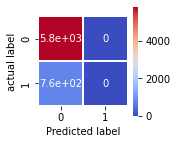

In [ ]:
plt.figure(figsize=(2,2))
sns.heatmap(cm,annot=True,linewidths=.5,square=True,cmap='coolwarm')
plt.ylabel('actual label')
plt.xlabel('Predicted label')

In [ ]:
(0+5835)/(6590)

0.8854324734446131

<strong><h4>Interpretación del estadistico Acuracci del modelo de regresión logistica</h4><strong/>
<h4>El 88.5% de las predicciones del modelo de regresión logistica son correctas</h4>

<strong><h4>Modelo de K vecinos más cercanos</h4><strong/>
<h4>Ahora probaremos el modelo de KNN</h4>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,y_train)  
y_predknn=knn.predict(x_test)
print(accuracy_score(y_test,y_predknn))


0.8840667678300456


In [ ]:
print(confusion_matrix(y_test, y_predknn))

[[5801   34]
 [ 730   25]]


In [ ]:
(25+5801)/6590

0.8840667678300456

<strong><h4>Interpretación del estadistico Acuracci del modelo de K vecinos más cercanos</h4><strong/>
<h4>El 88.4% de las predicciones del modelo de KNN son correctas</h4>

<strong><h4>Modelo de Árbol de desición</h4><strong/>
<h4>Ahora probaremos el modelo de árbol de desición</h4>

In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score

dt=tree.DecisionTreeClassifier(max_leaf_nodes=3)
dt.fit(x_train,y_train)
y_preddt=dt.predict(x_test)
print(accuracy_score(y_test,y_preddt))


0.8854324734446131


In [ ]:
print(confusion_matrix(y_test, y_preddt))

[[5835    0]
 [ 755    0]]


[Text(0.6, 0.8333333333333334, 'X[0] <= 60.5\ngini = 0.199\nsamples = 26360\nvalue = [23403, 2957]'),
 Text(0.4, 0.5, 'X[0] <= 28.5\ngini = 0.187\nsamples = 25782\nvalue = [23094, 2688]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.282\nsamples = 2686\nvalue = [2230, 456]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.175\nsamples = 23096\nvalue = [20864, 2232]'),
 Text(0.8, 0.5, 'gini = 0.498\nsamples = 578\nvalue = [309, 269]')]

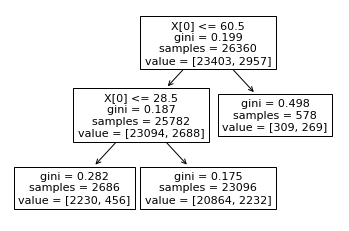

In [ ]:
tree.plot_tree(dt)

<strong><h4>Interpretación del estadistico Acuracci del modelo de  árbol de Decisión</h4><strong/>
<h4>El 88.5% de las predicciones del modelo de árbol de desición son correctas</h4>


<strong><h4>Ahora escalaremos los datos para ver si hay variación en los resultados anteriores obtenidos</h4></stong>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X= df1[['age']]

y = df1.Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

X_train

,age
26529,41
28227,29
27170,33
5460,27
3069,51
...,...
20757,25
32103,52
30403,56
21243,42


In [ ]:
from sklearn.preprocessing import MinMaxScaler
Xmin_max = df1[['age']]

scaler = MinMaxScaler().fit(Xmin_max)
#scaler.mean_, scaler.var_

In [ ]:
X_scaled = scaler.transform(X)
X_scaled

array([[0.39506173],
       [0.24691358],
       [0.75308642],
       ...,
       [0.45679012],
       [0.14814815],
       [0.22222222]])

In [ ]:
from sklearn.model_selection import train_test_split

y = df1.Target
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.2, random_state=0)

X_train

array([[0.2962963 ],
       [0.14814815],
       [0.19753086],
       ...,
       [0.48148148],
       [0.30864198],
       [0.11111111]])

<strong><h4>Regresión Logistica con los datos de la edad normalizados</h4></strong>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

logr = LogisticRegression()

logr.fit(x_train,y_train)

y_predlog = logr.predict(x_test)

print(accuracy_score(y_test, y_predlog))
print(confusion_matrix(y_test, y_predlog))

0.8854324734446131
[[5835    0]
 [ 755    0]]


<strong><h4>Interpretación del estadistico Acuracci del modelo de regresión logistica con los datos normalizados</h4><strong/>
<h4>El 88.5% de las predicciones del modelo de regresión logistica son correctas y la normalización de los datos no hizo ningún cambio en el estadistico acuracci</h4>

<strong><h4>Modelo KNN con los datos normalizados</h4></strong>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train,y_train)

y_predknn = knn.predict(X_test)

print(accuracy_score(y_test, y_predknn))
print(confusion_matrix(y_test, y_predknn))

0.8840667678300456
[[5800   35]
 [ 729   26]]


<strong><h4>Interpretación del estadistico Acuracci del modelo KNN con los datos normalizados</h4><strong/>
<h4>El 88.4% de las predicciones del modelo de KNN son correctas y la normalización de los datos no hizo ningún cambio significativo en el estadistico acuracci</h4>

In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score

dt = tree.DecisionTreeClassifier(max_leaf_nodes=3)

dt.fit(X_train,y_train)

y_preddt = dt.predict(X_test)

print(accuracy_score(y_test, y_preddt))
print(confusion_matrix(y_test, y_preddt))

0.8854324734446131
[[5835    0]
 [ 755    0]]


<strong><h4>Interpretación del estadistico Acuracci del modelo de Árbol de desición con los datos normalizados</h4><strong/>
<h4>El 88.5% de las predicciones del modelo de árbol de desición son correctas y la normalización de los datos no hizo ningún cambio significativo en el estadistico acuracci</h4>

<strong><h4>Conclusiones del uso de modelos supervisados</h4><strong/>
<h4>El acuracci más alto es el del modelo de árbol de desición y el del modelo de regresión logistica, en este caso considero que la mejor opción es el de la regresión logistica ya que el resultado de este modelo es la probabilidad de que el cliente pertenezca o no al grupo de personas que aceptaron el prestamo a largo plazo</h4>

<strong><h3>Modelos de Aprendizaje No Supervisado</h3><strong>

<strong><h4>Modelo KMeans</h4></strong>
<h3>Para este modelo realizaremos la clusterización de los datos de acuerdo a la variables 'edad' y 'Duración del último contacto'</h3>

<h3>Primero normalizaremos los datos</h3>

In [ ]:
from sklearn.preprocessing import MinMaxScaler
Xmin = df1[['age','duration']]

scaler = MinMaxScaler().fit(Xmin)
Xkm = scaler.transform(Xmin)
Xkm
#scaler.mean_, scaler.var_

array([[0.39506173, 0.04615697],
       [0.24691358, 0.04107361],
       [0.75308642, 0.23342822],
       ...,
       [0.45679012, 0.02663684],
       [0.14814815, 0.03355022],
       [0.22222222, 0.11061407]])

<h3>Encontremos el k indicado utilizando el método del codo</h3>

<function matplotlib.pyplot.show(*args, **kw)>

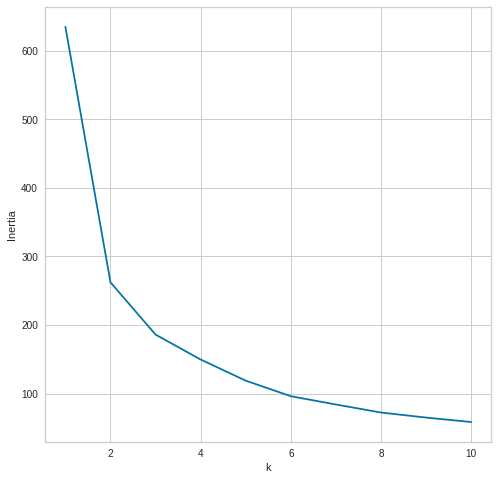

In [ ]:
sum_sq_d=[]
K=range(1,11)
for k in K:
  km=KMeans(n_clusters=k)
  km=km.fit(Xkm)
  sum_sq_d.append(km.inertia_)

plt.figure(figsize=(8,8))
plt.plot(K,sum_sq_d,'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show

<strong><h4>Interpretación de la gráfica del método de codo</h4></strong>
<h3>Siguiendo el método de codo el número de grupos ideal para este caso es de 2 o 3 que son los valores donde está la punta del "codo"</h3>

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
km.fit(Xkm)


KMeans(n_clusters=3)

In [ ]:
kmeans = pd.DataFrame(Xkm)
kmeans.head()

,0,1
0,0.395062,0.046157
1,0.246914,0.041074
2,0.753086,0.233428
3,0.234568,0.024400
4,0.518519,0.074827


In [ ]:
kmeans['cluster'] = km.predict(Xkm)
kmeans.head()

,0,1,cluster
0,0.395062,0.046157,1
1,0.246914,0.041074,0
2,0.753086,0.233428,1
3,0.234568,0.024400,2
4,0.518519,0.074827,1


In [ ]:
km.cluster_centers_

array([[0.3087512 , 0.05223376],
       [0.47481516, 0.05254089],
       [0.17235513, 0.05265279]])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


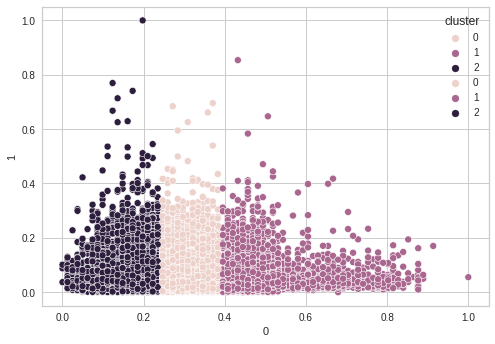

In [ ]:
sns.scatterplot(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s= 500, hue=[0,1,2],marker='x',color='black')
sns.scatterplot(data=kmeans, x=0, y=1, hue='cluster')

<strong><h4>Interpretación del método Kmeans para 3 grupos</h4></strong>
<h3>Según el método del codo 3 cluster son una buena opción para dividir el dataset, sin embargo, este método no es tan efectivo dado que los datos no tienen un comportamiento esferico, no obstante lo que podemos interpretar de la aplicación del método es que la duración de la llamada se mantiene en los mismos rangos para las tres divisiones de edad</h3>

<strong><h4>Aplicación del método PCA</h4></strong>
<h3>Se ha decidido que para este ejemplo no se aplicara el método PCA ya que las variables son pocas y no es necesario reducir el número de dimensiones ya que el dataset permite que se trabaje bien con el número actual</h3>

<strong><h2>Conexión a API del gobierno Colombiano</h2></strong>

<h3>Veamos si la entrega de créditos en Colombia está relacionada con el género para saber si debemos dar mayor importancia a la variable género en nuestro modelo</h3>



link:https://www.datos.gov.co/Econom-a-y-Finanzas/Inclusi-n-Financiera/ptgf-ywrb

In [ ]:
import requests
import json
import pandas as pd
url='https://www.datos.gov.co/resource/kx2f-xjdq.json'

In [ ]:
respuesta=requests.get(url)
print(respuesta)

<Response [200]>


In [ ]:
datos=json.loads(respuesta.text)

In [ ]:
dfgob=pd.DataFrame(datos)

In [ ]:
pd.options.display.max_columns = None

In [ ]:
dfgob.head(5)

,tipo_entidad,codigo_entidad,nombre_entidad,fecha_corte,unicap,descrip_uc,renglon,desc_renglon,tipo,_1_nro_corresponsales_f_sicos,_2_nro_corresponsales_f_sicos,_3_nro_corresponsales_f_sicos,_4_nro_corresponsales_f_sicos,_5_nro_dep_sitos,_6_monto_dep_sitos,_7_nro_giros_enviados,_8_monto_giros_enviados,_9_nro_giros_recibidos,_10_monto_giros_recibidos,_11_nro_pagos_corresponsales,_12_monto_pagos_corresponsales,_13_nro_retiros_corresponsales,_14_monto_retiros,_15_nro_transferencias,_16_monto_transferencias,_17_nro_transacciones_tr,_18_monto_transacciones,_19_nro_ctas_ahorro_hasta,_20_saldo_ctas_ahorro_hasta,_21_nro_ctas_ahorro_1smmlv,_22_saldo_ctas_ahorro_1smmlv,_23_nro_ctas_ahorr_3smmlv,_24_saldo_ctas_ahorr_3smmlv,_25_nro_ctas_ahorro_activas,_26_saldo_ctas_ahorro_activas,_27_nro_ctas_ahorro_mujeres,_28_saldo_ctas_ahorro_mujeres,_29_nro_ctas_ahorro_hombres,_30_saldo_ctas_ahorro_hombres,_31_nro_ctas_ahorro,_32_saldo_ctas_ahorro,_41_nro_cr_dito_consumo,_42_monto_cr_dito_consumo,_43_nro_cr_dito_consumo,_44_monto_cr_dito_consumo,_45_nro_cr_dito_consumo,_46_monto_cr_dito_consumo,_47_nro_cred_cons_bajo_monto,_48_monto_cred_cons_bajo,_49_nro_cred_cons_bajo_monto,_50_monto_cred_cons_bajo,_51_nro_cred_cons_bajo_monto,_52_monto_cred_cons_bajo,_53_nro_cr_dito_vivienda,_54_monto_cr_dito_vivienda,_55_nro_cr_dito_vivienda,_56_monto_cr_dito_vivienda,_57_nro_cr_dito_vivienda,_58_monto_cr_dito_vivienda,_59_nro_microcr_dito_hasta,_60_monto_microcr_dito_hasta,_61_nro_microcr_dito_1smmlv,_62_monto_microcr_dito_1smmlv,_63_nro_microcr_dito_2smmlv,_64_monto_microcr_dito_2smmlv,_65_nro_microcr_dito_3smmlv,_66_monto_microcr_dito_3smmlv,_67_nro_microcr_dito_4smmlv,_68_monto_microcr_dito_4smmlv,_69_nro_microcr_dito_10smmlv,_70_monto_microcr_dito_10smmlv,_71_nro_microcr_dito_mujeres,_72_monto_microcr_dito_mujeres,_73_nro_microcr_dito_hombres,_74_monto_microcr_dito_hombres,_75_nro_microcr_dito,_76_monto_microcr_dito,_77_nro_productos_a_nivel,_78_monto_saldo_productos,_79_nro_corresponsales_f,_80_nro_corresponsales_f,_81_nro_corresponsales_propios,_82_nro_corresponsales,_83_nro_corresponsales_m,_84_nro_corresponsales_m,_85_nro_dep_sitos,_86_monto_dep_sitos,_87_nro_giros_enviados,_88_monto_giros_enviados,_89_nro_giros_recibidos,_90_monto_giros_recibidos,_91_nro_pagos_corresponsales,_92_monto_pagos_corresponsales,_93_nro_retiros_corresponsales,_94_monto_retiros,_95_nro_transferencias,_96_monto_transferencias,_97_nro_transacciones_tr,_98_monto_transacciones
0,1,7,Bancolombia,2021-03-31T00:00:00.000,1,ANTIOQUIA,360,ITAGUI,Transacciones y tramites a traves de correspon...,0.00,0.00,0.00,0.00,530006.00,239976153179.00,245.00,35760870.00,86.00,17815200.00,312203.00,165151860269.00,627548.00,231807968212.00,25580.00,13171765561.00,1495668.00,650161323291.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1,39,Banco Davivienda,2021-03-31T00:00:00.000,1,ANTIOQUIA,91,BETANIA,Corresponsales fisicos,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1,30,Banco Caja Social S.A.,2021-03-31T00:00:00.000,1,ANTIOQUIA,1,MEDELLIN,Microcredito por rango,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,

<h3>Ahora vamos a modificar la información del dataFrame traído desde la gobernación para que podamos analizarla</h3>

<h4>Primero vamos a cambiar el nombre de algunas columnas para diferenciarlas mejor</h4>

In [ ]:
dfgob_renombrado=dfgob.rename({"_41_nro_cr_dito_consumo":"_41_nro_cr_dito_consumo_mujeres","_42_monto_cr_dito_consumo":"_42_monto_cr_dito_consumo_mujeres",
              "_43_nro_cr_dito_consumo":"_43_nro_cr_dito_consumo_hombres","_44_monto_cr_dito_consumo":"_44_monto_cr_dito_consumo_hombres",
              "_47_nro_cred_cons_bajo_monto":"_47_nro_cred_cons_bajo_monto_mujeres","_48_monto_cred_cons_bajo":"_48_monto_cred_cons_bajo_mujeres",
              "_49_nro_cred_cons_bajo_monto":"_49_nro_cred_cons_bajo_monto_hombres","_50_monto_cred_cons_bajo":"_50_monto_cred_cons_bajo_hombres",
              "_53_nro_cr_dito_vivienda":"_53_nro_cr_dito_vivienda_mujeres","_54_monto_cr_dito_vivienda":"_54_monto_cr_dito_vivienda_mujeres",
              "_55_nro_cr_dito_vivienda":"_55_nro_cr_dito_vivienda_hombres","_56_monto_cr_dito_vivienda":"_56_monto_cr_dito_vivienda_hombres"},axis='columns')

In [ ]:
dfgob_renombrado.head(5)

,tipo_entidad,codigo_entidad,nombre_entidad,fecha_corte,unicap,descrip_uc,renglon,desc_renglon,tipo,_1_nro_corresponsales_f_sicos,_2_nro_corresponsales_f_sicos,_3_nro_corresponsales_f_sicos,_4_nro_corresponsales_f_sicos,_5_nro_dep_sitos,_6_monto_dep_sitos,_7_nro_giros_enviados,_8_monto_giros_enviados,_9_nro_giros_recibidos,_10_monto_giros_recibidos,_11_nro_pagos_corresponsales,_12_monto_pagos_corresponsales,_13_nro_retiros_corresponsales,_14_monto_retiros,_15_nro_transferencias,_16_monto_transferencias,_17_nro_transacciones_tr,_18_monto_transacciones,_19_nro_ctas_ahorro_hasta,_20_saldo_ctas_ahorro_hasta,_21_nro_ctas_ahorro_1smmlv,_22_saldo_ctas_ahorro_1smmlv,_23_nro_ctas_ahorr_3smmlv,_24_saldo_ctas_ahorr_3smmlv,_25_nro_ctas_ahorro_activas,_26_saldo_ctas_ahorro_activas,_27_nro_ctas_ahorro_mujeres,_28_saldo_ctas_ahorro_mujeres,_29_nro_ctas_ahorro_hombres,_30_saldo_ctas_ahorro_hombres,_31_nro_ctas_ahorro,_32_saldo_ctas_ahorro,_41_nro_cr_dito_consumo_mujeres,_42_monto_cr_dito_consumo_mujeres,_43_nro_cr_dito_consumo_hombres,_44_monto_cr_dito_consumo_hombres,_45_nro_cr_dito_consumo,_46_monto_cr_dito_consumo,_47_nro_cred_cons_bajo_monto_mujeres,_48_monto_cred_cons_bajo_mujeres,_49_nro_cred_cons_bajo_monto_hombres,_50_monto_cred_cons_bajo_hombres,_51_nro_cred_cons_bajo_monto,_52_monto_cred_cons_bajo,_53_nro_cr_dito_vivienda_mujeres,_54_monto_cr_dito_vivienda_mujeres,_55_nro_cr_dito_vivienda_hombres,_56_monto_cr_dito_vivienda_hombres,_57_nro_cr_dito_vivienda,_58_monto_cr_dito_vivienda,_59_nro_microcr_dito_hasta,_60_monto_microcr_dito_hasta,_61_nro_microcr_dito_1smmlv,_62_monto_microcr_dito_1smmlv,_63_nro_microcr_dito_2smmlv,_64_monto_microcr_dito_2smmlv,_65_nro_microcr_dito_3smmlv,_66_monto_microcr_dito_3smmlv,_67_nro_microcr_dito_4smmlv,_68_monto_microcr_dito_4smmlv,_69_nro_microcr_dito_10smmlv,_70_monto_microcr_dito_10smmlv,_71_nro_microcr_dito_mujeres,_72_monto_microcr_dito_mujeres,_73_nro_microcr_dito_hombres,_74_monto_microcr_dito_hombres,_75_nro_microcr_dito,_76_monto_microcr_dito,_77_nro_productos_a_nivel,_78_monto_saldo_productos,_79_nro_corresponsales_f,_80_nro_corresponsales_f,_81_nro_corresponsales_propios,_82_nro_corresponsales,_83_nro_corresponsales_m,_84_nro_corresponsales_m,_85_nro_dep_sitos,_86_monto_dep_sitos,_87_nro_giros_enviados,_88_monto_giros_enviados,_89_nro_giros_recibidos,_90_monto_giros_recibidos,_91_nro_pagos_corresponsales,_92_monto_pagos_corresponsales,_93_nro_retiros_corresponsales,_94_monto_retiros,_95_nro_transferencias,_96_monto_transferencias,_97_nro_transacciones_tr,_98_monto_transacciones
0,1,7,Bancolombia,2021-03-31T00:00:00.000,1,ANTIOQUIA,360,ITAGUI,Transacciones y tramites a traves de correspon...,0.00,0.00,0.00,0.00,530006.00,239976153179.00,245.00,35760870.00,86.00,17815200.00,312203.00,165151860269.00,627548.00,231807968212.00,25580.00,13171765561.00,1495668.00,650161323291.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1,39,Banco Davivienda,2021-03-31T00:00:00.000,1,ANTIOQUIA,91,BETANIA,Corresponsales fisicos,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1,30,Banco Caja Social S.A.,2021-03-31T00:00:00.000,1,ANTIOQUIA,1,MEDELLIN,Microcredito por rango,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00

In [ ]:
dfgob_final=dfgob_renombrado[['nombre_entidad','tipo','_27_nro_ctas_ahorro_mujeres','_29_nro_ctas_ahorro_hombres',
                              '_41_nro_cr_dito_consumo_mujeres','_43_nro_cr_dito_consumo_hombres','_47_nro_cred_cons_bajo_monto_mujeres','_49_nro_cred_cons_bajo_monto_hombres',
                              '_53_nro_cr_dito_vivienda_mujeres','_55_nro_cr_dito_vivienda_hombres','_71_nro_microcr_dito_mujeres',
                             '_73_nro_microcr_dito_hombres']]

In [ ]:
dfgob_final.head(5)

,nombre_entidad,tipo,_27_nro_ctas_ahorro_mujeres,_29_nro_ctas_ahorro_hombres,_41_nro_cr_dito_consumo_mujeres,_43_nro_cr_dito_consumo_hombres,_47_nro_cred_cons_bajo_monto_mujeres,_49_nro_cred_cons_bajo_monto_hombres,_53_nro_cr_dito_vivienda_mujeres,_55_nro_cr_dito_vivienda_hombres,_71_nro_microcr_dito_mujeres,_73_nro_microcr_dito_hombres
0,Bancolombia,Transacciones y tramites a traves de correspon...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,Banco Davivienda,Corresponsales fisicos,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,Banco Caja Social S.A.,Microcredito por rango,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,Scotiabank Colpatria S.A.,Corresponsales fisicos,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,Banagrario,Credito de consumo,0.00,0.00,6.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00


<h4>Ahora analizaremos el tipo de datos del dataFrame</h4>

In [ ]:
dfgob_final.dtypes

nombre_entidad                          object
tipo                                    object
_27_nro_ctas_ahorro_mujeres             object
_29_nro_ctas_ahorro_hombres             object
_41_nro_cr_dito_consumo_mujeres         object
_43_nro_cr_dito_consumo_hombres         object
_47_nro_cred_cons_bajo_monto_mujeres    object
_49_nro_cred_cons_bajo_monto_hombres    object
_53_nro_cr_dito_vivienda_mujeres        object
_55_nro_cr_dito_vivienda_hombres        object
_71_nro_microcr_dito_mujeres            object
_73_nro_microcr_dito_hombres            object
dtype: object

<h4>Es necesario cambiar el tipo de datos de varias columnas del dataFrame a numerico ya que es de tipo texto y así no podremos analizarlos</h4>

In [ ]:
for i in (dfgob_final.columns):
   if i!="tipo" and i!="nombre_entidad":
    dfgob_final[i]=pd.to_numeric(dfgob_final[i],errors='coerce')

<ipython-input-79-7401307e9937>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfgob_final[i]=pd.to_numeric(dfgob_final[i],errors='coerce')


In [ ]:
dfgob_final.dtypes

nombre_entidad                           object
tipo                                     object
_27_nro_ctas_ahorro_mujeres             float64
_29_nro_ctas_ahorro_hombres             float64
_41_nro_cr_dito_consumo_mujeres         float64
_43_nro_cr_dito_consumo_hombres         float64
_47_nro_cred_cons_bajo_monto_mujeres    float64
_49_nro_cred_cons_bajo_monto_hombres    float64
_53_nro_cr_dito_vivienda_mujeres        float64
_55_nro_cr_dito_vivienda_hombres        float64
_71_nro_microcr_dito_mujeres            float64
_73_nro_microcr_dito_hombres            float64
dtype: object

In [ ]:
dfgob_final.describe()

,_27_nro_ctas_ahorro_mujeres,_29_nro_ctas_ahorro_hombres,_41_nro_cr_dito_consumo_mujeres,_43_nro_cr_dito_consumo_hombres,_47_nro_cred_cons_bajo_monto_mujeres,_49_nro_cred_cons_bajo_monto_hombres,_53_nro_cr_dito_vivienda_mujeres,_55_nro_cr_dito_vivienda_hombres,_71_nro_microcr_dito_mujeres,_73_nro_microcr_dito_hombres
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.0,1000.000000,1000.000000,1000.00000,1000.000000
mean,889.299000,1003.009000,268.866000,329.473000,0.0,0.0,0.515000,0.626000,10.14400,9.010000
std,11877.081931,13234.301214,7819.394313,9547.210625,0.0,0.0,6.737148,9.408009,178.83645,144.588899
min,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.000000
max,298422.000000,330764.000000,247061.000000,301580.000000,0.0,0.0,157.000000,256.000000,4777.00000,3610.000000


<h4>Vemos que el promedio de números de crédito varía por género según el tipo de crédito, el tipo de crédito que estamos analizando en nuestro proyecto tendría un comportamiento similar a los créditos de vivienda que son a largo plazo y se observa que en créditos de vivienda el número de créditos promedio de los hombres es mayor que el de las mujeres.</h4>

In [ ]:
dfgob_final.groupby('nombre_entidad').mean()

,_27_nro_ctas_ahorro_mujeres,_29_nro_ctas_ahorro_hombres,_41_nro_cr_dito_consumo_mujeres,_43_nro_cr_dito_consumo_hombres,_47_nro_cred_cons_bajo_monto_mujeres,_49_nro_cred_cons_bajo_monto_hombres,_53_nro_cr_dito_vivienda_mujeres,_55_nro_cr_dito_vivienda_hombres,_71_nro_microcr_dito_mujeres,_73_nro_microcr_dito_hombres
nombre_entidad,,,,,,,,,,
AV Villas,83.625000,199.625000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
BBVA Colombia,4145.200000,4558.506667,26.040000,25.826667,0.0,0.0,2.093333,3.413333,0.000000,0.000000
Banagrario,243.903448,328.400000,0.862069,0.710345,0.0,0.0,0.000000,0.000000,3.117241,4.055172
Bancamia S.A.,1733.960526,1256.618421,0.000000,0.000000,0.0,0.0,0.000000,0.000000,66.921053,53.236842
Banco Caja Social S.A.,60.888889,76.833333,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
Banco Davivienda,127.881579,174.118421,3421.184211,4203.960526,0.0,0.0,0.171053,0.223684,0.000000,0.000000
Banco Falabella S.A.,128.184615,174.123077,2.938462,2.861538,0.0,0.0,0.000000,0.000000,0.000000,0.000000
Banco Pichincha S.A.,0.000000,0.000000,0.000000,0.021739,0.0,0.0,0.000000,0.000000,0.000000,0.000000
Banco Popular,14251.500000,18121.375000,19.375000,15.375000,0.0,0.0,0.125000,0.250000,0.000000,0.000000


<h4>Despues de revisar los números promedio de créditos de vivienda en Colombia en las diferentes entidades bancarias se puede ver que en los distintos tipos de créditos afecta el género, incluso, se observa que en todos los bancos hay un mayor número de créditos de vivienda otorgados a hombres, lo que puede significar que el género es una variable de interes a considerar en el modelo para el otorgamiento de los créditos a largo plazo</h4>